![ine-divider](https://user-images.githubusercontent.com/7065401/92672068-398e8080-f2ee-11ea-82d6-ad53f7feb5c0.png)
<hr>

### Introduction to Data Science with Python — Starter Pass

# Predicting heart diseases

In this project, you will be using a dataset from a cardiovascular study on residents of the town of Framingham, Massachusetts. This dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

The goal of this project **predict whether the patient has 10-year risk of future coronary heart disease (CHD)**. To do that you will need to put in practice all the topics you saw on previous lessons.

![heart](https://user-images.githubusercontent.com/7065401/103839631-9583ce80-506e-11eb-87fe-3ebf2a7a0be8.png)

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Knowing our data

Before starting it's important to load all the libraries we'll be using and understand the data we'll be working on.

---
### Attributes

#### Demographic

- Sex: male or female
- Age: Age of the patient
- Education: no further information provided

#### Behavioral

- Current Smoker: whether or not the patient is a current smoker
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day

#### Information on medical history
- BP Meds: whether or not the patient was on blood pressure medication
- Prevalent Stroke: whether or not the patient had previously had a stroke
- Prevalent Hyp: whether or not the patient was hypertensive
- Diabetes: whether or not the patient had diabetes

#### Information on current medical condition
- Tot Chol: total cholesterol level
- Sys BP: systolic blood pressure
- Dia BP: diastolic blood pressure
- BMI: Body Mass Index
- Heart Rate: heart rate - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.
- Glucose: glucose level

#### Target variable to predict
- TenYearCHD: 10 year risk of coronary heart disease (binary: “1:Yes”, “0:No”)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/heart.csv')

Take a look at some records of your data, analyze columns and values:

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Dealing with missing values

Check if there is any missing value on the data.

> In that case remove the rows with missing values. An advanced approach could be imputting values or removing insignificant columns with more than 30% of missing values.

In [7]:
# a good strategy is to check the percentage of
# missing values on the data
df.isna().mean()

male               0.000000
age                0.000000
education          0.024776
currentSmoker      0.000000
cigsPerDay         0.006843
BPMeds             0.012506
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011798
sysBP              0.000000
diaBP              0.000000
BMI                0.004483
heartRate          0.000236
glucose            0.091553
TenYearCHD         0.000000
dtype: float64

In [8]:
# in that case we will drop all the rows with missing values
df.dropna(inplace=True)

In [9]:
df.isna().mean()

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Correlation analysis

Plot a heatmap showing correlation between variables.

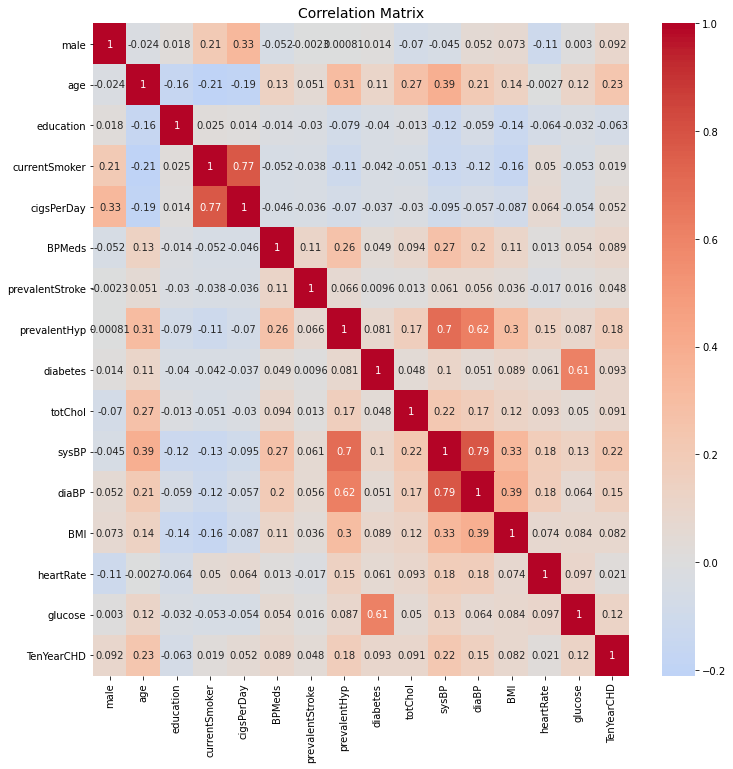

In [10]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(df.corr(), center=0, cmap="coolwarm", annot=True)
ax.set_title(u"Correlation Matrix", fontsize=14)
plt.show()

---
### Have you detected any high correlated variables?

If yes remove one of them to avoid collinearity.

- `Prevalent Hyp` (whether or not the patient was hypertensive) is highly correlated with `Sys BP` and `Dia BP` which indicate blood pressure. **We will remove `Sys BP` and `Dia BP` feature.

- `diabetes` is highly correlated with `glocose`. **We will remove `glucose` feature**.

In [11]:
df.drop(['sysBP', 'diaBP', 'glucose'], axis=1, inplace=True)

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Features and Labels

Assign to the `X` variable your features, and to the `y` variable your labels.

In [12]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [13]:
X.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate
0,39,4.0,0,0.0,0.0,0,0,0,195.0,26.97,80.0
1,46,2.0,0,0.0,0.0,0,0,0,250.0,28.73,95.0
2,48,1.0,1,20.0,0.0,0,0,0,245.0,25.34,75.0
3,61,3.0,1,30.0,0.0,0,1,0,225.0,28.58,65.0
4,46,3.0,1,23.0,0.0,0,0,0,285.0,23.10,85.0


In [14]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Standardization

As the `X` features aren't on the same scale, let's standardize them.

To do that use the `StandardScaler` from scikit-learn.

In [15]:
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(X)

X

array([[-1.23335117,  1.97575158, -0.97835241, ..., -0.94971428,
         0.29168785,  0.35633992],
       [-0.41559058,  0.01979497, -0.97835241, ...,  0.29772868,
         0.7246142 ,  1.60828949],
       [-0.1819447 , -0.95818334,  1.02212657, ...,  0.18432477,
        -0.10926099, -0.06097661],
       ...,
       [ 0.05170118, -0.95818334,  1.02212657, ...,  1.72661789,
         0.04570696, -0.81214636],
       [ 0.16852412,  0.99777327,  1.02212657, ..., -0.67754491,
        -1.49413337, -0.89560966],
       [ 0.28534706,  0.01979497, -0.97835241, ...,  0.72866352,
        -1.06120701,  0.35633992]])

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Train and test splits

Let's split the `X` and `y` data into training and testing sets.

Keep 80% of the data in the training set and 20% of the data in the test set.

> You can use a `random_state` to reproduce your problem the same every time it is run.

In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", X_test.shape)
print("Shape of X_test: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (2924, 11)
Shape of y_train:  (732, 11)
Shape of X_test:  (2924,)
Shape of y_test:  (732,)


![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## My first model

Now you will need to create a model to make predictions. In this case you will need to create a `LogisticRegression` classifier:

1. Create the classifier `clf` model.
2. Fit/train that model with your `X_train` and `y_train` data.
3. Get the predictions of that model over your `X_test` set.
4. Get the score of that model using your `X_test` and `y_test` data.


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# create model
clf = LogisticRegression(random_state=123)

# fit/train model
clf.fit(X_train, y_train)

# get predictions
y_pred = clf.predict(X_test)

# show confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# get model score
clf.score(X_test, y_test)

[[611   8]
 [109   4]]


0.8401639344262295

> The overall accuracy is high simply because most patients do not have the disease, not because our model is perfect. **Our data is not balanced**, so our model could be overfit and predictions could be not real. The easiest solution could be down-sampling the majority class previous to train our model, which involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Other classifiers

scikit-learn offers a lot of methods/algorithms for this type of problems. Are we sure that the `LogisticRegression` classifier we used is the best model?

Let's try other methods/algorithms to see if any of them can achieve a better score.

> You can try a `RandomForestClassifier`, a `DecisionTreeClassifier`, a `LinearSVC`, or any other classifier from scikit-learn.


In [18]:
from sklearn.ensemble import RandomForestClassifier


# create model
clf = RandomForestClassifier(random_state=123)

# fit/train model
clf.fit(X_train, y_train)

# get predictions
y_pred = clf.predict(X_test)

# show confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# get model score
clf.score(X_test, y_test)

[[606  13]
 [107   6]]


0.8360655737704918

In [19]:
from sklearn.tree import DecisionTreeClassifier


# create model
clf = DecisionTreeClassifier(random_state=123)

# fit/train model
clf.fit(X_train, y_train)

# get predictions
y_pred = clf.predict(X_test)

# show confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# get model score
clf.score(X_test, y_test)

[[518 101]
 [ 89  24]]


0.7404371584699454

In [20]:
from sklearn.svm import LinearSVC


# create model
clf = LinearSVC(random_state=123, max_iter=5000)

# fit/train model
clf.fit(X_train, y_train)

# get predictions
y_pred = clf.predict(X_test)

# show confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# get model score
clf.score(X_test, y_test)

[[617   2]
 [112   1]]


0.8442622950819673

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)